/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Validation Accuracy: 0.9001112535030771


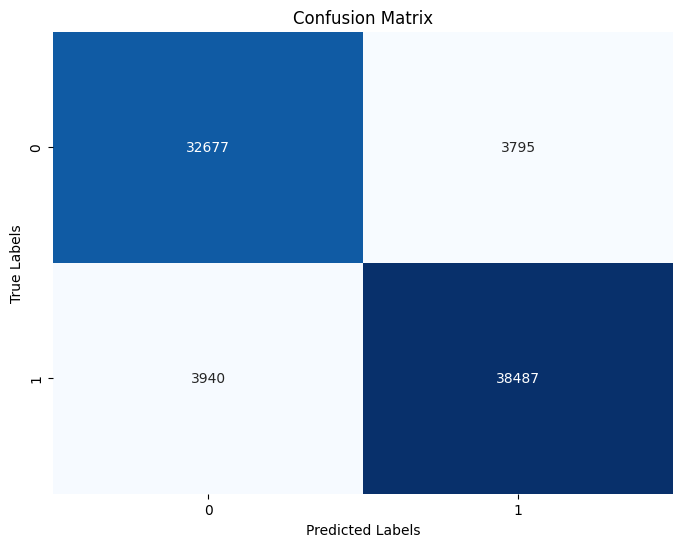

Test Accuracy: 0.9019632694964448

Test Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.90      0.89     36472
         1.0       0.91      0.91      0.91     42427

    accuracy                           0.90     78899
   macro avg       0.90      0.90      0.90     78899
weighted avg       0.90      0.90      0.90     78899



In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
import joblib
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset
data = pd.read_csv("/kaggle/input/fakenewscorpus/preprocessed_data.csv")

# Splitting into X (features) and y (target)
X = data['content']
y = data['label']

# Split the dataset into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# Vectorize the input data (X) using TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_val_vec = vectorizer.transform(X_val)
X_test_vec = vectorizer.transform(X_test)
# Save the vectorizer
joblib.dump(vectorizer, "lr_tfidf.pkl")

# Train LogisticRegression classifier
classifier = LogisticRegression()
classifier.fit(X_train_vec, y_train)
# Save the classifier
joblib.dump(classifier, "lr_classifier.pkl")

# Validation with validation data
val_score = classifier.score(X_val_vec, y_val)
print("Validation Accuracy:", val_score)

# Predictions with test data
y_pred = classifier.predict(X_test_vec)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
report_test = classification_report(y_test, y_pred)

# Visualize confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print and save the reports
print("Test Accuracy:", accuracy)
print("\nTest Classification Report:")
print(report_test)

# Save the reports to a file
with open("lr_report.txt", "w") as file:
    file.write("Test Accuracy: {}\n\n".format(accuracy))
    file.write("Test Classification Report:\n")
    file.write(report_test)


Cross-domain validation with LIAR Dataset

Accuracy: 0.5769534333070244
Precision: 0.5735497819483394
Recall: 0.5769534333070244
F1-score: 0.5751649278942019


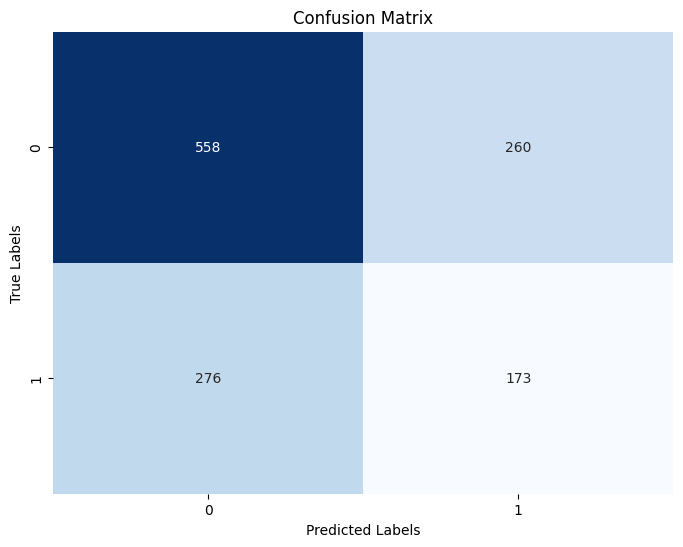

In [5]:
# Load the LIAR Cross-Domain Test data
test_df = pd.read_csv("/kaggle/input/cross-domain-data-liar/labeled-strictness-high-test.tsv", sep='\t', header=None)

# Extract news (X) and labels (y) from the test data
X = test_df[2]  # News Content in column 2
y = test_df[14]  # Label in column 15


# Load the saved vectorizer
vectorizer = joblib.load("lr_tfidf.pkl")

# Vectorize the news data
X_vec = vectorizer.transform(X)


# Load the saved classifier
classifier = joblib.load("lr_classifier.pkl")

# Make predictions
y_pred = classifier.predict(X_vec)

# Calculate accuracy
accuracy = accuracy_score(y, y_pred)

# Calculate precision, recall, and f1-score
precision = precision_score(y, y_pred, average='weighted')
recall = recall_score(y, y_pred, average='weighted')
f1 = f1_score(y, y_pred, average='weighted')

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Visualize confusion matrix
conf_matrix = confusion_matrix(y, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Classification including Title and Domain along with Content

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Validation Score: 0.9798186521133566
Test Accuracy: 0.9782936812484011

Test Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98     35845
         1.0       0.98      0.98      0.98     42335

    accuracy                           0.98     78180
   macro avg       0.98      0.98      0.98     78180
weighted avg       0.98      0.98      0.98     78180



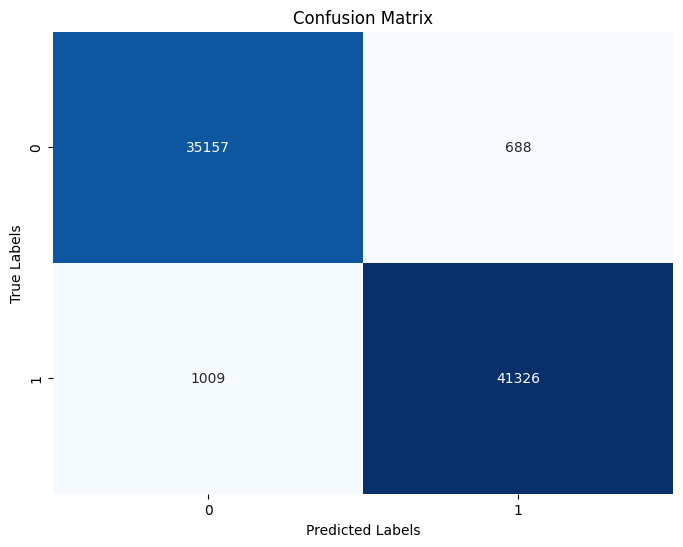

In [6]:
# Drop rows with NaN values in 'title' and 'domain' columns
data = data.dropna(subset=['title', 'domain'])

# Convert 'title' and 'domain' columns to string
data['title'] = data['title'].astype(str)
data['domain'] = data['domain'].astype(str)

# Concatenate 'content', 'title', and 'domain' columns
X = data[['content', 'title', 'domain']].apply(lambda x: ' '.join(x), axis=1)
y = data['label']

# Split the dataset into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# Vectorization
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_val_vec = vectorizer.transform(X_val)
X_test_vec = vectorizer.transform(X_test)
joblib.dump(vectorizer, "lr_vec-t-d.pkl")

# Train a Naive Bayes classifier
classifier = LogisticRegression()
classifier.fit(X_train_vec, y_train)

# Save the classifier
joblib.dump(classifier, "lr_count_classifier-t-d.pkl")

# Validation with validation data
val_score = classifier.score(X_val_vec, y_val)
print("Validation Score:", val_score)

# Predictions with test data
y_pred = classifier.predict(X_test_vec)

# Evaluate the classifier
test_accuracy = accuracy_score(y_test, y_pred)
report_test = classification_report(y_test, y_pred)


# Print and save the reports
print("Test Accuracy:", test_accuracy)
print("\nTest Classification Report:")
print(report_test)

# Visualize confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Save the reports to a file
with open("lr_count_report-t-d.txt", "w") as file:
    file.write("Test Accuracy: {}\n\n".format(test_accuracy))
    file.write("Test Classification Report:\n")
    file.write(report_test)

Cross-domain validation

Accuracy: 0.5824782951854776
Precision: 0.5343943970785191
Recall: 0.5824782951854776
F1-score: 0.5451181946843018


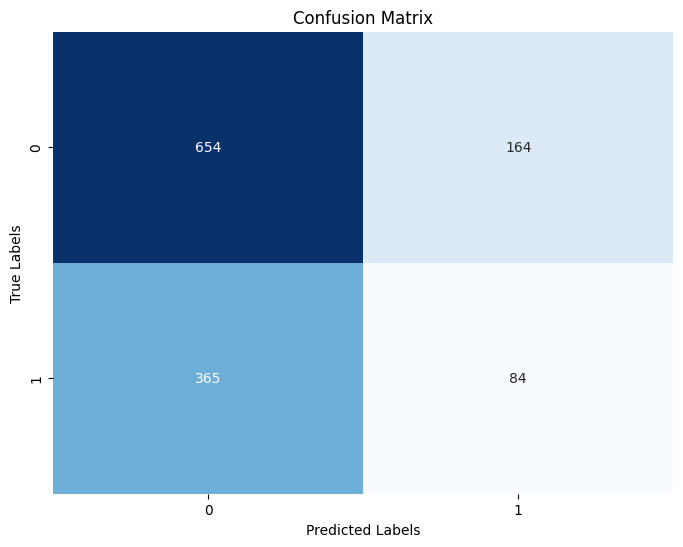

In [7]:
# Load the LIAR Cross-Domain Test data
test_df = pd.read_csv("/kaggle/input/cross-domain-data-liar/labeled-strictness-high-test.tsv", sep='\t', header=None)

# Extract news (X) and labels (y) from the test data
X = test_df[2]  # News Content in column 2
y = test_df[14]  # Label in column 15


# Load the saved vectorizer
vectorizer = joblib.load("lr_vec-t-d.pkl")

# Vectorize the text data
X_vec = vectorizer.transform(X)


# Load the saved classifier
classifier = joblib.load("lr_count_classifier-t-d.pkl")

# Make predictions
y_pred = classifier.predict(X_vec)

# Calculate accuracy
accuracy = accuracy_score(y, y_pred)

# Calculate precision, recall, and f1-score
precision = precision_score(y, y_pred, average='weighted')
recall = recall_score(y, y_pred, average='weighted')
f1 = f1_score(y, y_pred, average='weighted')

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Visualize confusion matrix
conf_matrix = confusion_matrix(y, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()